# Programming Exercise 6 - Support Vector Machines

## Introduction
In this exercise, you will be using support vector machines (SVMs) to build a spam classifier.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io # Used to load the OCTAVE *.mat files
import scipy.optimize # fmin_cg to train the linear regression
from sklearn import svm # SVM software

## 1. Support Vector Machines

### 1.1 Visualizing the dataset

In [2]:
datafile = 'data/ex6data1.mat'
mat = scipy.io.loadmat(datafile)
# Training set
X, y = mat['X'], mat['y']

# SVM software는 자동으로 1을 X에 넣어줌

# Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

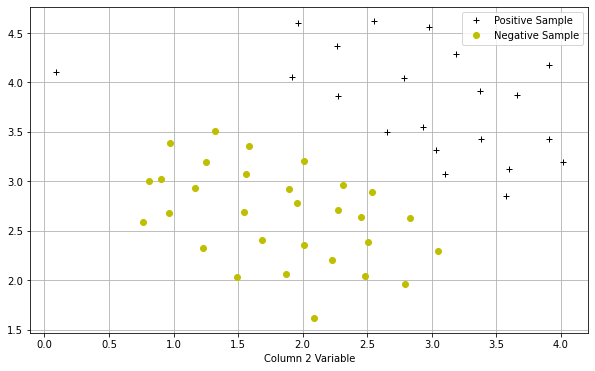

In [3]:
def plotData():
    plt.figure(figsize = (10,6))
    plt.plot(pos[:, 0], pos[:, 1], 'k+', label = 'Positive Sample')
    plt.plot(neg[:, 0], neg[:, 1], 'yo', label = 'Negative Sample')
    plt.xlabel('Column 1 Variable')
    plt.xlabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
plotData()

In [4]:
#Function to draw the SVM boundary
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    """
    Function to plot the decision boundary for a trained SVM
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the SVM classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    xvals = np.linspace(xmin,xmax,100)
    yvals = np.linspace(ymin,ymax,100)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(my_svm.predict(np.array([[xvals[i],yvals[j]]])))
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")

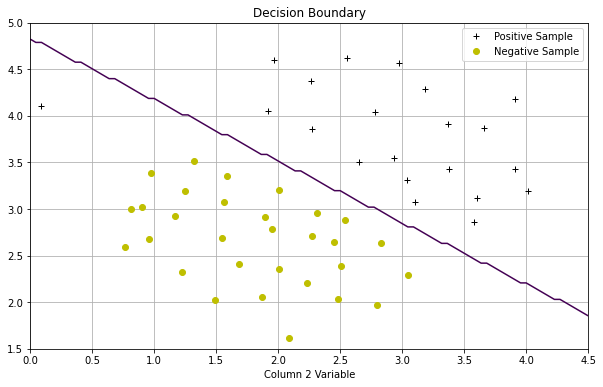

In [5]:
# Run the SVM training (with C = 1) using SVM software.
# When C = 1, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point on the far left

# First we make an instance of an SVM with C = 1 and 'Linear' kernel
linear_svm = svm.SVC(C = 1, kernel = 'linear')
# Now we fit the SVM to our X matrix (no bias unit)
linear_svm.fit(X, y.flatten())
# Now we plot the decision boundary
plotData()
plotBoundary(linear_svm,0,4.5,1.5,5)

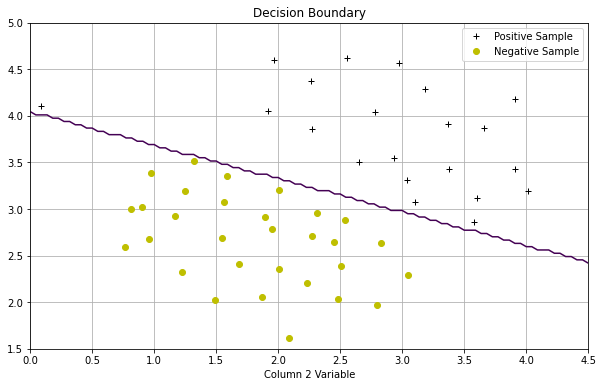

In [6]:
# When C = 100, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data.
linear_svm = svm.SVC(C = 100, kernel = 'linear')
linear_svm.fit(X,y.flatten())
plotData()
plotBoundary(linear_svm, 0, 4.5, 1.5, 5)

### 1.2 SVM with Gaussian Kernels

#### 1.2.1 Gaussian Kernel

In [7]:
# Here's how to use this SVM software with a custom kernel:
# http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html
def gaussKernel(x1, x2 ,sigma):
    sigmasquared = np.power(sigma,2)
    return np.exp(-(x1-x2).T.dot(x1-x2)/(2*sigmasquared))

# x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
# sim = gaussianKernel(x1, x2, sigma);
# this value should be about 0.324652
print(gaussKernel(np.array([1, 2, 1]),np.array([0, 4, -1]), 2.))

0.32465246735834974


#### 1.2.2 Example Dataset 2

In [8]:
datafile = 'data/ex6data2.mat'
mat = scipy.io.loadmat(datafile)

In [9]:
# Training set
X, y = mat['X'], mat['y']

# Divide the sample into two: ones with positive classification, one with null classification
pos = []
neg = []
for i in range(X.shape[0]):
    if y[i] == 1:
        pos.append(X[i])
    if y[i] == 0:
        neg.append(X[i])
pos = np.array(pos)
neg = np.array(neg)

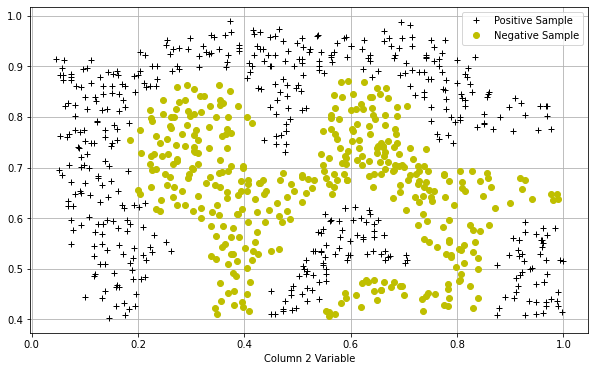

In [10]:
plotData()

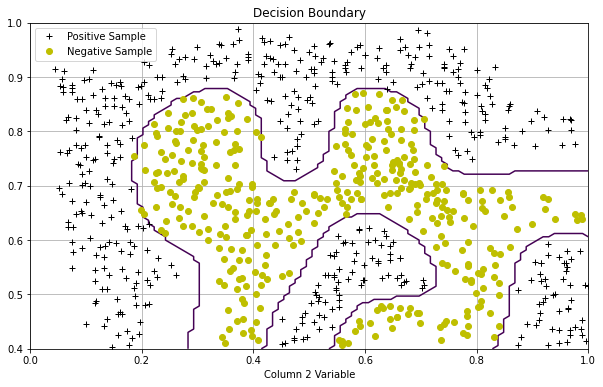

In [11]:
# Train the SVM with the Gaussian Kernel on this dataset.
sigma = 0.1
gamma = np.power(sigma, -2.)
gaus_svm = svm.SVC(C = 1, kernel = 'rbf', gamma = gamma)
gaus_svm.fit(X, y.flatten())
plotData()
plotBoundary(gaus_svm, 0, 1, .4, 1.0)

#### 1.2.3 Example Dataset 3

In [12]:
datafile = 'data/ex6data3.mat'
mat = scipy.io.loadmat( datafile )
#Training set
X, y = mat['X'], mat['y']
Xval, yval = mat['Xval'], mat['yval']

#Divide the sample into two: ones with positive classification, one with null classification
pos = []
neg = []
for i in range(X.shape[0]):
    if y[i] == 1:
        pos.append(X[i])
    if y[i] == 0:
        neg.append(X[i])
pos = np.array(pos)
neg = np.array(neg)

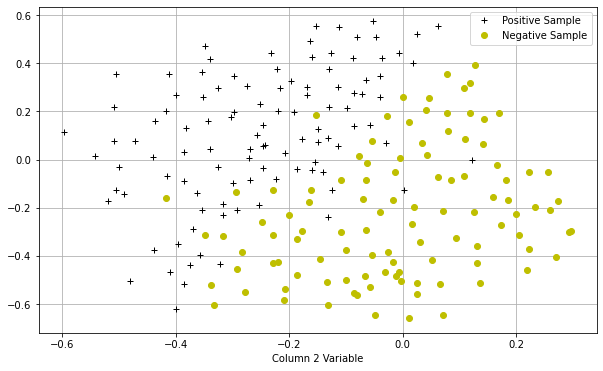

In [13]:
plotData()

In [14]:
# Your task is to use the cross validation set Xval, yval to determine the best C and σ parameter to use

# The score() function for a trained SVM takes in X and y to test the score on, and the (float)value returned is "Mean accuracy of self.predict(X) wrt. y"

Cvalues = [0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.]
sigmavalues = Cvalues
best_pair, best_score = [0, 0], 0

for Cvalue in Cvalues:
    for sigmavalue in sigmavalues:
        gamma = np.power(sigmavalue, -2.)
        gaus_svm = svm.SVC(C = Cvalue, kernel = 'rbf', gamma = gamma)
        gaus_svm.fit(X,y.flatten())
        this_score = gaus_svm.score(Xval, yval)
        # Print this_score
        if this_score > best_score:
            best_score = this_score
            best_pair = (Cvalue, sigmavalue)

print("Best C, sigma pair is ({}, {}) with a score of {}.".format(best_pair[0], best_pair[1], best_score))

Best C, sigma pair is (0.3, 0.1) with a score of 0.965.


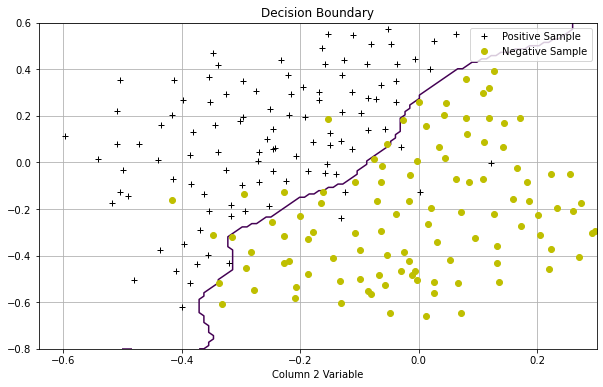

In [15]:
gaus_svm = svm.SVC(C = best_pair[0], kernel = 'rbf', gamma = np.power(best_pair[1],-2.))
gaus_svm.fit(X, y.flatten())
plotData()
plotBoundary(gaus_svm, -0.5, .3, -0.8, .6 )

## 2. Spam Classification

In [16]:
import re # Regular expression for e-mail processing
# This is one possible porter stemmer 
# (note: I had to do a pip install stemming)
# https://pypi.python.org/pypi/stemming/1.0
from stemming.porter2 import stem

# This porter stemmer seems to more accurately duplicate the
# porter stemmer used in the OCTAVE assignment code
# (note: I had to do a pip install nltk)
# I'll note that both stemmers have very similar results
import nltk, nltk.stem.porter

### 2.1 Preprocessing Emails 

In [17]:
print("emailSample1.txt:")
!cat data/emailSample1.txt

emailSample1.txt:
> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com



In [18]:
def preProcess(email):
    """
    Function to do some pre processing (simplification of e-mails).
    Comments throughout implementation describe what it does.
    Input = raw e-mail
    Output = processed (simplified) email
    """
    # Make the entire e-mail lower case
    email = email.lower()

    # Strip html tags (strings that look like <blah> where 'blah' does not) contain '<' or '>') ... replace with a space
    email = re.sub('<[^<>]+>', ' ', email)

    # Any numbers get replaced with the string 'number'
    email = re.sub('[0-9]+', 'number', email)

    # Anything starting with http or https:// replaced with 'httpaddr'
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email)

    # Strings with "@" in the middle are considered emails --> 'emailaddr'
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email)

    # The '$' sign gets replaced with 'dollar'
    email = re.sub('[$]+', 'dollar', email)

    return email

In [19]:
def email2TokenList(raw_email):
    """
    Function that takes in preprocessed (simplified) email, tokenizes it,
    stems each word, and returns an (ordered) list of tokens in the
    email
    """

    # I'll use the NLTK stemmer because it more accurately duplicates the performance of the OCTAVE implementation in the assignment
    stemmer = nltk.stem.porter.PorterStemmer()

    email = preProcess(raw_email)

    # Split the email into individual words (tokens) (split by the delimiter ' ')
    # but also split by delimiters '@', '$', '/'. etc
    # Splitting by many delimiters is easiest with re.split()
    tokens = re.split('[ \@\$\/\#\.\-\:\&\*\+\=\[\]\?\!\(\)\{\}\,\'\"\>\_\<\;\%]', email)

    # Loop over each word (token) and use a stemmer to shorten it,
    # then check if the word is in the vocab_list... if it is,
    # store what index in the vocab_list the word is
    tokenlist = []
    for token in tokens:
        # Remove any non alphanumeric characters
        token = re.sub('[^a-zA-Z0-9]', '', token)

        # Use the Porter stemmer to stem the word
        stemmed = stemmer.stem(token)

        # Throw out empty tokens
        if not len(token): continue

        # Store a list of all unique stemmed words
        tokenlist.append(stemmed)
    
    return tokenlist

#### 2.1.1 Vocabulary List

In [20]:
def getVocabDict(reverse = False):
    """
    Function to read in the supplied vocab list text file into a dictionary.
    I'll use this for now, but since I'm using a slightly different stemmer,
    I'd like to generate this list myself from some sort of data set...
    Dictionary key is the stemmed word, value is the index in the text file
    If "reverse", the keys and values are switched.
    """
    vocab_dict = {}
    with open("data/vocab.txt") as f:
        for line in f:
            (val, key) = line.split()
            if not reverse:
                vocab_dict[key] = int(val)
            else:
                vocab_dict[int(val)] = key
    return vocab_dict

In [21]:
def email2VocabIndices(raw_email, vocab_dict):
    """
    Function that takes in a raw eamil and returns a list of indices corresponding
    to the location in vocab_dict for each stemmed word in the email.
    """
    tokenlist = email2TokenList(raw_email)
    index_list = [vocab_dict[token] for token in tokenlist if token in vocab_dict]
    return index_list

### 2.2 Extracting Features from Emails

In [22]:
def email2FeatureVector(raw_email, vocab_dict):
    """
    Function that takes as input a raw email, and returns a vector of shape
    (n, 1) where n is the size of the vocab_dict.
    The first element in this vector is 1 if the vocab word with index == 1 is in the raw_email, 0 otherwise.
    """
    n = len(vocab_dict)
    result = np.zeros((n,1))
    vocab_indices = email2VocabIndices(email_contents, vocab_dict)
    for idx in vocab_indices:
        result[idx] = 1
    return result

In [23]:
# " ... run your code on the email sample. You should see that the feature vector 
# has length 1899 and 45 non-zero entries."

vocab_dict = getVocabDict()
email_contents = open( 'data/emailSample1.txt', 'r' ).read()
test_fv = email2FeatureVector( email_contents, vocab_dict )

print("Length of feature vector is %d" % len(test_fv))
print("Number of non-zero entries is: %d" % sum(test_fv==1))

Length of feature vector is 1899
Number of non-zero entries is: 45


### 2.3 Training SVM for Spam Classification

In [24]:
# Read in the training set and test set provided
# Note the feature vectors correspond to the stemming implementation
# done in the OCTAVE code... which may be different than mine.

# Training set
datafile = 'data/spamTrain.mat'
mat = scipy.io.loadmat( datafile )
X, y = mat['X'], mat['y']
#NOT inserting a column of 1's in case SVM software does it for me automatically...
#X =     np.insert(X    ,0,1,axis=1)

# Test set
datafile = 'data/spamTest.mat'
mat = scipy.io.loadmat( datafile )
Xtest, ytest = mat['Xtest'], mat['ytest']

In [25]:
pos = []
neg = []
for i in range(X.shape[0]):
    if y[i] == 1:
        pos.append(X[i])
    if y[i] == 0:
        neg.append(X[i])
pos = np.array(pos)
neg = np.array(neg)
print('Total number of training emails = ',X.shape[0])
print('Number of training spam emails = ',pos.shape[0])
print('Number of training nonspam emails = ',neg.shape[0])

Total number of training emails =  4000
Number of training spam emails =  1277
Number of training nonspam emails =  2723


In [26]:
# Run the SVM training (with C = 0.1) using SVM software.

# First we make an instance of an SVM with C = 0.1 and 'Linear' kernel
linear_svm = svm.SVC(C = 0.1, kernel = 'linear')

# Now we fit the SVM to our X matrix, given the labels y
linear_svm.fit(X,y.flatten())

SVC(C=0.1, kernel='linear')

In [27]:
# "Once the training completes, you should see that the classifier gets a training accuracy of about 99.8% and a test accuracy of about 98.5%"

train_predictions = linear_svm.predict(X).reshape((y.shape[0],1))
train_acc  = 100. * float(sum(train_predictions == y))/y.shape[0]
print("Training accuracy = {}%".format(train_acc))

test_predictions = linear_svm.predict(Xtest).reshape((ytest.shape[0],1))
test_acc = 100. * float(sum(test_predictions == ytest))/ytest.shape[0]
print('Test set accuracy = {}%'.format(test_acc))

Training accuracy = 99.825%
Test set accuracy = 98.9%


### 2.4 Top Predictors for Spam

In [28]:
# Determine the words most likely to indicate an e-mail is a spam
# From the trained SVM we can get a list of the weight coefficients for each
# word (technically, each word index)

vocab_dict_flipped = getVocabDict(reverse=True)

#Sort indicies from most important to least-important (high to low weight)
sorted_indices = np.argsort(linear_svm.coef_, axis=None)[::-1]
print("The 15 most important words to classify a spam e-mail are:")
print([ vocab_dict_flipped[x] for x in sorted_indices[:15] ])
print("\n")
print("The 15 least important words to classify a spam e-mail are:")
print([ vocab_dict_flipped[x] for x in sorted_indices[-15:] ])
print("\n")

# Most common word (mostly to debug):
most_common_word = vocab_dict_flipped[sorted_indices[0]]
print('# of spam containing \"%s\" = %d/%d = %0.2f%%'% \
    (most_common_word, sum(pos[:,1190]),pos.shape[0],  \
     100.*float(sum(pos[:,1190]))/pos.shape[0]))
print('# of NON spam containing \"%s\" = %d/%d = %0.2f%%'% \
    (most_common_word, sum(neg[:,1190]),neg.shape[0],      \
     100.*float(sum(neg[:,1190]))/neg.shape[0]))

The 15 most important words to classify a spam e-mail are:
['otherwis', 'clearli', 'remot', 'gt', 'visa', 'base', 'doesn', 'wife', 'previous', 'player', 'mortgag', 'natur', 'll', 'futur', 'hot']


The 15 least important words to classify a spam e-mail are:
['http', 'toll', 'xp', 'ratio', 'august', 'unsubscrib', 'useless', 'numberth', 'round', 'linux', 'datapow', 'wrong', 'urgent', 'that', 'spam']


# of spam containing "otherwis" = 804/1277 = 62.96%
# of NON spam containing "otherwis" = 301/2723 = 11.05%
